In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import timeit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
import os
os.getcwd()
os.chdir("/home/aumaron/Desktop/other_projects/")

In [3]:
# Data
demand_forecast = pd.read_excel("datasets/Daily_Demand_Forecasting_Orders.xlsx", engine="openpyxl")
demand_forecast.dropna(how="all", subset=["Target (Total orders)"], inplace=True)

demand_forecast.fillna(demand_forecast.mean(), inplace=True)

print(demand_forecast.shape)
target = np.array(demand_forecast.loc[:, "Target (Total orders)"])
demand_forecast.drop(columns=["Target (Total orders)"], inplace=True)
train_array = np.array(demand_forecast)

(60, 13)


In [4]:
# split data into train and test sets
from sklearn.model_selection import train_test_split

seed = 10
X_train, X_test, y_train, y_test = train_test_split(train_array, target, test_size=0.25, random_state=seed)

In [ ]:
# standardScaler
def _standard_scaler(_data):
    # Scaling the data
    scale = StandardScaler().fit(_data)
    _data[i] = scale.transform(_data)
    return _data

### Linear Regression: Without penalty

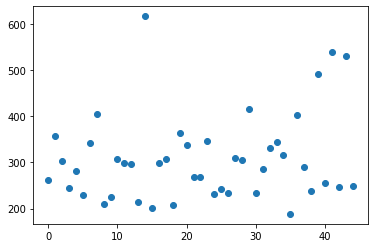

In [5]:
plt.scatter([i for i in range(X_train.shape[0])], y_train)

In [6]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [7]:
pred = reg.predict(X_test)
print(pred - y_test)

[-5.68434189e-14  5.68434189e-13  1.30739863e-12 -8.52651283e-14
 -1.98951966e-13 -7.95807864e-13 -5.11590770e-13  1.42108547e-13
  2.84217094e-13 -3.41060513e-13 -3.41060513e-13 -1.47792889e-12
  5.96855898e-13  2.04636308e-12 -6.53699317e-13]


In [8]:
mse = mean_squared_error(y_true=y_test, y_pred=pred, squared=False)
score = reg.score(X_train, y_train)

In [9]:
mse

8.353275304503185e-13

In [7]:
a = linear_model.LinearRegression()
a

LinearRegression()

### Linear Model

In [7]:
# testcode = '''
def forecast_linear_model(train_array, 
                          target, 
                          _test_size=0.25, 
                          _alpha=None,
                          _l1_ratio=0.5,
                          with_penalty=True, 
                          regulariser=None):
    """
    Linear model function.
    
    train_array: np.array
        Training data
    target: np.array
        Feature/ attribute to be predicted
    _test_size: float
        proportion of test data
    alpha: float, default 0.1 if with_penalty=True
    _l1_ratio: float, default 0.5 if with_penalty and regulariser='elasticnet'
    with_penalty: bool, default=True
    regulariser: str, default="l1"
        Type of regularisation; 'l1' or 'elasticnet'
    """
    out_dict = {}
    if not with_penalty:
        clf = linear_model.LinearRegression()
#         print('Lin Reg')
    else:
        if not _alpha:
            _alpha = 0.1
        if regulariser:
            if regulariser == "l1" or regulariser == "lasso":
                clf = linear_model.Lasso(alpha=_alpha)
#                 print('Lasso')
            else:
                clf = linear_model.ElasticNet(l1_ratio=_l1_ratio)
#                 print('Elastic')
        else:
            clf = linear_model.ElasticNet(l1_ratio=_l1_ratio)
#             print('Elastic')
#     print('regulariser ->', regulariser)
#     print('l1_ratio ->', _l1_ratio)
    # split data into train and test sets
    for i in range(1):
        from sklearn.model_selection import train_test_split
    #     seed = 10
        X_train, X_test, y_train, y_test = train_test_split(train_array, target, test_size=_test_size)
    
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        mse = mean_squared_error(y_test, pred, squared=False)
    #     score = reg.score(pred)
        _score = r2_score(y_test, pred)
        
        out_dict[f"coeff{i}"] = clf.coef_
        out_dict[f"predict{i}"] = pred
        out_dict[f"mse{i}"] = mse
        out_dict[f"score{i}"] = _score
    
    return out_dict


In [12]:
__mse = []
__alpha = []
# for _alph in np.arange(0.1, 1, 0.1):
__out = forecast_linear_model(train_array,
                             target,
                             _test_size=0.25,
                             _alpha=_alph,
                             _l1_ratio=0.5,
                             regulariser="lasso",
                             with_penalty=False)
print(__out)
#     print(f"For alpha of {_alph} -\n Coef -> {_out['coeff']} \n RMSE -> {_out['mse']} \n R2 score -> {_out['score']}\n")
#     __mse.append(_out['mse'])
#     __alpha.append(_alph)
# print(np.array(__alpha))
# plt.plot(np.array(__alpha), np.array(__mse))
# plt.xlabel("alpha")
# plt.ylabel("RMSE")
# plt.show()

{'coeff0': array([ 1.73085530e-13,  2.11134929e-13, -1.53249389e-14, -3.54217185e-15,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -1.35610060e-15,
        1.12350450e-17,  1.06251813e-17,  2.92734587e-18,  4.35849273e-17]), 'predict0': array([297.174, 333.359, 316.849, 231.035, 539.577, 281.42 , 323.603,
       286.412, 415.187, 255.061, 224.675, 229.249, 416.83 , 259.246,
       233.126]), 'mse0': 1.3140136311680785e-12, 'score0': 1.0}


In [15]:
# For regression with lasso penaliser
print(_out["coeff0"])
# For regular regression
print(__out["coeff0"])

[-0.00000000e+00  0.00000000e+00  5.09499517e-03  3.64093460e-03
  9.96440670e-01  9.97040772e-01  9.96313152e-01  1.46424036e-05
 -2.18371104e-06 -1.44770803e-06 -1.62770126e-06  2.56323718e-07]
[ 1.73085530e-13  2.11134929e-13 -1.53249389e-14 -3.54217185e-15
  1.00000000e+00  1.00000000e+00  1.00000000e+00 -1.35610060e-15
  1.12350450e-17  1.06251813e-17  2.92734587e-18  4.35849273e-17]


### Performance Testing

In [21]:
%%timeit -n 1000
_out = forecast_linear_model(train_array,
                                 target,
                                 _test_size=0.25,
                                 _alpha=0.1,
                                 _l1_ratio=0.5,
                                 regulariser="l1",
                                 with_penalty=True)

1.83 ms ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
%%timeit -n 1000
_out = forecast_linear_model(train_array,
                                 target,
                                 _test_size=0.25,
                                 _alpha=0.1,
                                 _l1_ratio=0.5,
                                 regulariser="elasticnet",
                                 with_penalty=True)

1.99 ms ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [23]:
%%timeit -n 1000
_out = forecast_linear_model(train_array,
                                 target,
                                 _test_size=0.25,
                                 _alpha=0.1,
                                 _l1_ratio=0.5,
                                 regulariser=None,
                                 with_penalty=True)

1.97 ms ± 4.72 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Testing on dummy data of size 10000 X 10

In [9]:
import numpy
# x is your dataset
x = numpy.random.rand(10000, 50)
numpy.random.shuffle(x)
train_array = x[:, :49]
target = x[:, 49:50]
# split data into train and test sets
# from sklearn.model_selection import train_test_split

# seed = 10
# X_train, X_test, y_train, y_test = train_test_split(train_array, target, test_size=0.25, random_state=seed)

In [10]:
res = []
for _reg in ["l1", "elasticnet", None]:
    a = %timeit -o forecast_linear_model(train_array,target,_test_size=0.25,_alpha=0.1,_l1_ratio=0.5,regulariser=_reg,with_penalty=True)
    res.append(a)

156 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
144 ms ± 19.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
149 ms ± 22.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
for i in range(3):
    print("-----------")
    print(res[i].timings)

-----------
[0.1627075149999655, 0.14740139660002569, 0.16278652430000876, 0.16385655869999027, 0.16279121970001142, 0.16306924759996946, 0.12833500850001656]
-----------
[0.1570165136000014, 0.13132073649999257, 0.10836402709996946, 0.12848766090000935, 0.1568398131000322, 0.16351024270002198, 0.16305706269999973]
-----------
[0.17002039550002337, 0.12736693659999218, 0.10381658319997769, 0.16206501739998203, 0.16471989689998737, 0.16447293810001612, 0.15182346760002474]
